# Double 7's Intra (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY makes an intraday 7-day low, buy.
    3. If the SPY makes an intraday 7-day high, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()
use_adj = False

Define high low trade periods

In [4]:
period = 7

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, use_adj, period)
s.run()

Retrieve log DataFrames

In [6]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [7]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
375,2019-07-31,298.50,2019-08-13,294.12,-4.38,-1178.22,269,69183.42,LONG,SPY
376,2019-08-14,288.04,2019-08-30,294.22,6.18,1693.32,274,70876.74,LONG,SPY
377,2019-09-20,300.34,2019-10-11,296.27,-4.07,-1094.83,269,69781.91,LONG,SPY
378,2019-11-21,309.54,2019-11-25,312.69,3.15,809.55,257,70591.45,LONG,SPY
379,2019-12-03,308.65,2019-12-12,315.31,6.66,1738.26,261,72329.72,LONG,SPY
380,2019-12-31,320.53,2020-01-02,323.80,3.27,837.12,256,73166.83,LONG,SPY
381,2020-01-03,321.16,2020-01-08,324.89,3.73,962.34,258,74129.18,LONG,SPY
382,2020-01-24,328.62,2020-02-05,332.27,3.65,934.40,256,75063.57,LONG,SPY
383,2020-02-20,334.75,2020-03-26,256.35,-78.40,-19913.60,254,55149.98,LONG,SPY
384,2020-06-11,308.13,2020-07-02,314.50,6.37,1344.07,211,56494.04,LONG,SPY


In [8]:
dbal.head()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
1993-11-11,10026.88,9966.41,9973.12,215,2.50,1.00,O
1993-11-12,10053.75,9986.56,10020.16,215,2.50,1.00,-
1993-11-15,10040.31,9986.56,10013.44,215,2.50,1.00,-
1993-11-16,10053.75,10053.75,10053.75,0,10053.75,0.00,X
1993-11-17,10053.75,10053.75,10053.75,0,10053.75,0.00,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                  1993-11-11
end                                                    2020-07-14
beginning_balance                                           10000
ending_balance                                           66494.04
total_net_profit                                         56494.04
gross_profit                                            149394.92
gross_loss                                              -92900.88
profit_factor                                                1.61
return_on_initial_capital                                  564.94
annual_return_rate                                           7.36
trading_period                           26 years 8 months 3 days
pct_time_in_market                                          42.80
margin                                                          1
avg_leverage                                                 1.00
max_leverage                                                 1.00
min_levera

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end, use_adj=s._use_adj)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-07-14 00:00:00 SELL 215 SPY @ 316.03


Plot Equity Curves: Strategy vs Benchmark

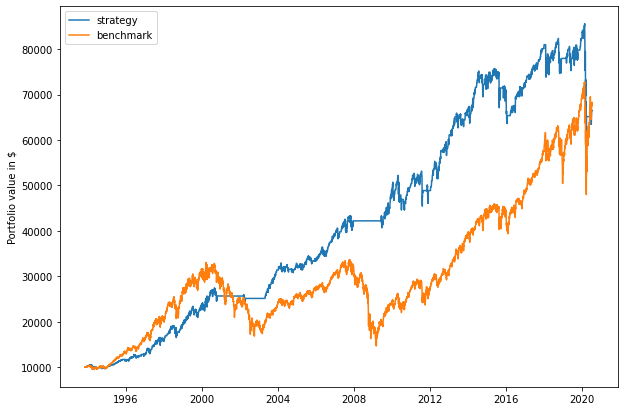

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

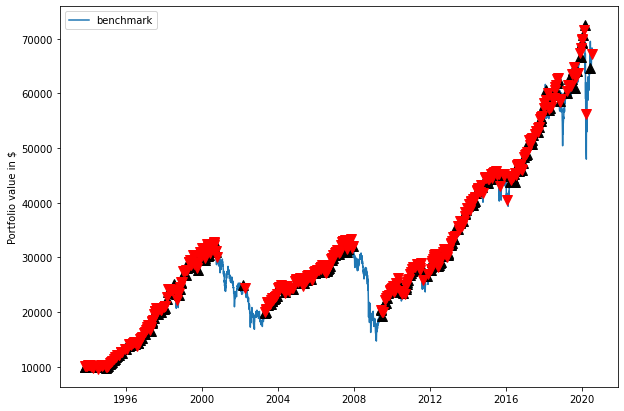

In [12]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,7.36,7.45
max_closed_out_drawdown,-33.82,-56.42
drawdown_annualized_return,-4.59,-7.57
drawdown_recovery,-0.09,-1.42
best_month,14.97,23.06
worst_month,-31.38,-31.38
sharpe_ratio,0.64,0.47
sortino_ratio,0.54,0.60
monthly_std,2.72,4.54


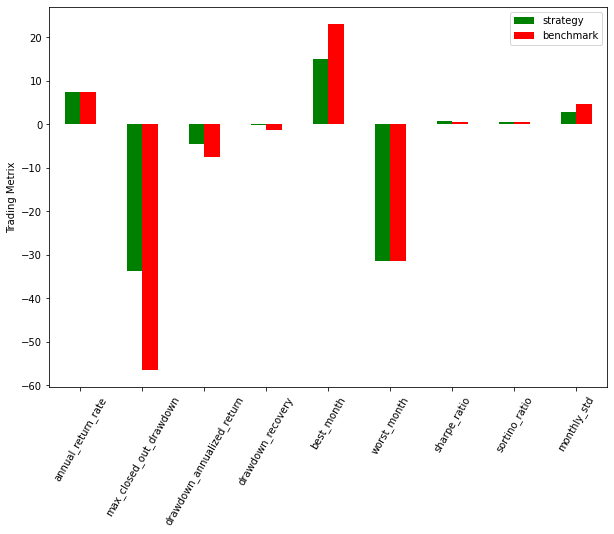

In [13]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, metrics)
df